# PyTorch Tensors: From Zero to Hero

## A Comprehensive Guide to Tensor Operations for Deep Learning

---

### What You'll Learn

1. **What are Tensors?** - The building blocks of deep learning
2. **Creating Tensors** - Multiple ways to create and initialize
3. **Tensor Attributes** - Shape, dtype, device
4. **Indexing & Slicing** - Accessing tensor elements
5. **Basic Operations** - Math, broadcasting, in-place ops
6. **Reshaping Tensors** - view, reshape, squeeze, permute
7. **Linear Algebra** - Matrix operations essential for DL
8. **Einstein Summation** - Powerful notation for tensor ops
9. **Common DL Operations** - Softmax, activations, normalization
10. **Practical Patterns** - Real-world PyTorch snippets

---

In [ ]:
# Install PyTorch if needed (uncomment for Colab)
# !pip install torch torchvision

import torch
import numpy as np
import matplotlib.pyplot as plt

# Check PyTorch version and available devices
print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA Device: {torch.cuda.get_device_name(0)}")

PyTorch Version: 2.9.0+cpu
CUDA Available: False


---

# Part 1: What is a Tensor?

## The Universal Data Container

A **tensor** is a generalization of vectors and matrices to potentially higher dimensions.

```
Scalar (0D tensor):  5                    <- just a number
Vector (1D tensor):  [1, 2, 3]            <- a list of numbers
Matrix (2D tensor):  [[1, 2], [3, 4]]     <- a table of numbers
3D tensor:           [[[1,2],[3,4]], [[5,6],[7,8]]]  <- a "cube" of numbers
```

### Visual Representation

```
0D (Scalar)     1D (Vector)      2D (Matrix)         3D Tensor
                                                     
    [5]          [1 2 3 4]       [[1 2 3]            [[[1 2]
                                  [4 5 6]              [3 4]]
                                  [7 8 9]]            [[5 6]
                                                       [7 8]]]
    
  shape: ()     shape: (4,)     shape: (3,3)        shape: (2,2,2)
  0 axes        1 axis          2 axes              3 axes
```

In [ ]:
# Let's create tensors of different dimensions

# 0D Tensor (Scalar)
scalar = torch.tensor(42)
print("=== 0D Tensor (Scalar) ===")
print(f"Value: {scalar}")
print(f"Shape: {scalar.shape}")
print(f"Dimensions: {scalar.ndim}")
print()

=== 0D Tensor (Scalar) ===
Value: 42
Shape: torch.Size([])
Dimensions: 0



In [ ]:
# 1D Tensor (Vector)
vector = torch.tensor([1, 2, 3, 4, 5])
print("=== 1D Tensor (Vector) ===")
print(f"Value: {vector}")
print(f"Shape: {vector.shape}")
print(f"Dimensions: {vector.ndim}")
print(f"Number of elements: {vector.numel()}")
print()

=== 1D Tensor (Vector) ===
Value: tensor([1, 2, 3, 4, 5])
Shape: torch.Size([5])
Dimensions: 1
Number of elements: 5



In [ ]:
# 2D Tensor (Matrix)
matrix = torch.tensor([[1, 2, 3],
                       [4, 5, 6],
                       [7, 8, 9]])
print("=== 2D Tensor (Matrix) ===")
print(f"Value:\n{matrix}")
print(f"Shape: {matrix.shape}")
print(f"Dimensions: {matrix.ndim}")
print(f"Number of elements: {matrix.numel()}")
print()

=== 2D Tensor (Matrix) ===
Value:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Shape: torch.Size([3, 3])
Dimensions: 2
Number of elements: 9



In [ ]:
# 3D Tensor (think: batch of matrices, or RGB image)
tensor_3d = torch.tensor([[[1, 2], [3, 4]],
                          [[5, 6], [7, 8]]])
print("=== 3D Tensor ===")
print(f"Value:\n{tensor_3d}")
print(f"Shape: {tensor_3d.shape}")
print(f"Dimensions: {tensor_3d.ndim}")
print(f"Number of elements: {tensor_3d.numel()}")

=== 3D Tensor ===
Value:
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
Shape: torch.Size([2, 2, 2])
Dimensions: 3
Number of elements: 8


### Why Tensors in Deep Learning?

| Data Type | Tensor Shape | Example |
|-----------|--------------|----------|
| Single number | `()` | Loss value: `0.5` |
| Feature vector | `(features,)` | Word embedding: `(300,)` |
| Batch of vectors | `(batch, features)` | Batch of embeddings: `(32, 300)` |
| Grayscale image | `(height, width)` | MNIST digit: `(28, 28)` |
| Color image | `(channels, height, width)` | RGB image: `(3, 224, 224)` |
| Batch of images | `(batch, channels, height, width)` | Image batch: `(32, 3, 224, 224)` |
| Sequence | `(sequence_length, features)` | Time series: `(100, 10)` |
| Batch of sequences | `(batch, sequence, features)` | Text batch: `(32, 50, 512)` |

---

# Part 2: Creating Tensors

PyTorch offers many ways to create tensors. Let's explore them all!

## 2.1 From Python Lists

In [ ]:
# From a Python list
t1 = torch.tensor([1, 2, 3, 4])
print(f"From list: {t1}")
print(f"Dtype: {t1.dtype}")  # Default: int64 for integers

# From nested lists (creates 2D tensor)
t2 = torch.tensor([[1, 2], [3, 4]])
print(f"\nFrom nested list:\n{t2}")

# With floating point numbers
t3 = torch.tensor([1.0, 2.0, 3.0])
print(f"\nWith floats: {t3}")
print(f"Dtype: {t3.dtype}")  # Default: float32 for floats

From list: tensor([1, 2, 3, 4])
Dtype: torch.int64

From nested list:
tensor([[1, 2],
        [3, 4]])

With floats: tensor([1., 2., 3.])
Dtype: torch.float32


## 2.2 From NumPy Arrays

In [ ]:
# From NumPy array
np_array = np.array([[1, 2, 3], [4, 5, 6]])
tensor_from_np = torch.from_numpy(np_array)

print(f"NumPy array:\n{np_array}")
print(f"\nPyTorch tensor:\n{tensor_from_np}")

# IMPORTANT: They share memory!
np_array[0, 0] = 999
print(f"\nAfter modifying NumPy array:")
print(f"NumPy: {np_array[0, 0]}")
print(f"Tensor: {tensor_from_np[0, 0]}")
print("They share the same memory!")

NumPy array:
[[1 2 3]
 [4 5 6]]

PyTorch tensor:
tensor([[1, 2, 3],
        [4, 5, 6]])

After modifying NumPy array:
NumPy: 999
Tensor: 999
They share the same memory!


In [ ]:
# To avoid memory sharing, use .clone() or torch.tensor()
np_array2 = np.array([1, 2, 3])
tensor_copy = torch.tensor(np_array2)  # Creates a copy

np_array2[0] = 999
print(f"NumPy modified: {np_array2}")
print(f"Tensor unchanged: {tensor_copy}")

NumPy modified: [999   2   3]
Tensor unchanged: tensor([1, 2, 3])


## 2.3 Special Initialization Functions

In [ ]:
# Zeros - useful for bias initialization
zeros = torch.zeros(3, 4)
print("torch.zeros(3, 4):")
print(zeros)
print()

torch.zeros(3, 4):
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])



In [ ]:
# Ones
ones = torch.ones(2, 3)
print("torch.ones(2, 3):")
print(ones)
print()

torch.ones(2, 3):
tensor([[1., 1., 1.],
        [1., 1., 1.]])



In [ ]:
# Full - fill with any value
full = torch.full((2, 3), fill_value=3.14)
print("torch.full((2, 3), 3.14):")
print(full)
print()

torch.full((2, 3), 3.14):
tensor([[3.1400, 3.1400, 3.1400],
        [3.1400, 3.1400, 3.1400]])



In [ ]:
# Identity matrix - crucial for linear algebra
eye = torch.eye(4)
print("torch.eye(4):")
print(eye)
print()

torch.eye(4):
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])



In [ ]:
# Arange - like Python's range()
arange = torch.arange(0, 10, 2)  # start, end (exclusive), step
print(f"torch.arange(0, 10, 2): {arange}")

# Linspace - evenly spaced values
linspace = torch.linspace(0, 1, 5)  # start, end, num_points
print(f"torch.linspace(0, 1, 5): {linspace}")

torch.arange(0, 10, 2): tensor([0, 2, 4, 6, 8])
torch.linspace(0, 1, 5): tensor([0.0000, 0.2500, 0.5000, 0.7500, 1.0000])


## 2.4 Random Tensors (Essential for Weight Initialization!)

In [ ]:
# Set seed for reproducibility
torch.manual_seed(42)

# Uniform distribution [0, 1)
uniform = torch.rand(3, 3)
print("torch.rand(3, 3) - Uniform [0, 1):")
print(uniform)
print()

torch.rand(3, 3) - Uniform [0, 1):
tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009],
        [0.2566, 0.7936, 0.9408]])



In [ ]:
# Normal distribution (mean=0, std=1)
normal = torch.randn(3, 3)
print("torch.randn(3, 3) - Normal(0, 1):")
print(normal)
print()

torch.randn(3, 3) - Normal(0, 1):
tensor([[ 1.5231,  0.6647, -1.0324],
        [-0.2770, -0.1671, -0.1079],
        [-1.4285, -0.2810,  0.7489]])



In [ ]:
# Random integers
randint = torch.randint(low=0, high=10, size=(3, 3))
print("torch.randint(0, 10, (3, 3)):")
print(randint)

torch.randint(0, 10, (3, 3)):
tensor([[9, 2, 0],
        [5, 9, 3],
        [4, 9, 6]])


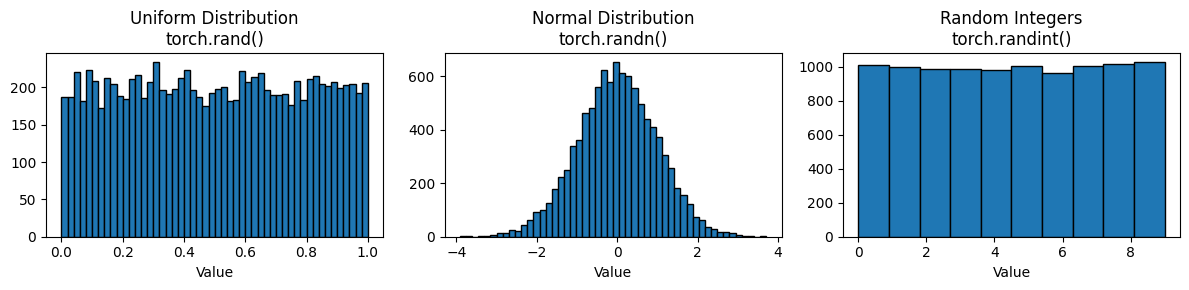

In [ ]:
# Visualize distributions
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Uniform
uniform_samples = torch.rand(10000)
axes[0].hist(uniform_samples.numpy(), bins=50, edgecolor='black')
axes[0].set_title('Uniform Distribution\ntorch.rand()')
axes[0].set_xlabel('Value')

# Normal
normal_samples = torch.randn(10000)
axes[1].hist(normal_samples.numpy(), bins=50, edgecolor='black')
axes[1].set_title('Normal Distribution\ntorch.randn()')
axes[1].set_xlabel('Value')

# Random integers
int_samples = torch.randint(0, 10, (10000,))
axes[2].hist(int_samples.numpy(), bins=10, edgecolor='black')
axes[2].set_title('Random Integers\ntorch.randint()')
axes[2].set_xlabel('Value')

plt.tight_layout()
plt.show()

## 2.5 Creating Tensors Like Other Tensors

In [ ]:
# Create a reference tensor
reference = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
print(f"Reference tensor (shape={reference.shape}, dtype={reference.dtype})")
print(reference)
print()

# Create tensors with same shape and dtype
zeros_like = torch.zeros_like(reference)
ones_like = torch.ones_like(reference)
rand_like = torch.rand_like(reference)

print(f"zeros_like:\n{zeros_like}\n")
print(f"ones_like:\n{ones_like}\n")
print(f"rand_like:\n{rand_like}")

Reference tensor (shape=torch.Size([2, 2]), dtype=torch.float32)
tensor([[1., 2.],
        [3., 4.]])

zeros_like:
tensor([[0., 0.],
        [0., 0.]])

ones_like:
tensor([[1., 1.],
        [1., 1.]])

rand_like:
tensor([[0.2296, 0.6819],
        [0.7305, 0.9644]])


---

# Part 3: Tensor Attributes - Shape, Dtype, Device

Every tensor has three fundamental attributes you must understand.

## 3.1 Shape - The Dimensions of Your Data

```
Shape tells you how many elements along each axis.

Example: shape (2, 3, 4) means:
- 2 elements along axis 0
- 3 elements along axis 1  
- 4 elements along axis 2
- Total: 2 × 3 × 4 = 24 elements
```

In [ ]:
# Shape examples
t = torch.randn(2, 3, 4)  # 3D tensor

print(f"Tensor shape: {t.shape}")
print(f"Tensor shape (alternative): {t.size()}")  # Same thing!
print()

# Access individual dimensions
print(f"Dimension 0 (batch): {t.shape[0]}")
print(f"Dimension 1 (rows): {t.shape[1]}")
print(f"Dimension 2 (cols): {t.shape[2]}")
print()

# Useful properties
print(f"Number of dimensions: {t.ndim}")
print(f"Total elements: {t.numel()}")

Tensor shape: torch.Size([2, 3, 4])
Tensor shape (alternative): torch.Size([2, 3, 4])

Dimension 0 (batch): 2
Dimension 1 (rows): 3
Dimension 2 (cols): 4

Number of dimensions: 3
Total elements: 24


## 3.2 Dtype - Data Type

| Dtype | Description | Use Case |
|-------|-------------|----------|
| `torch.float32` (default) | 32-bit float | Neural network weights, most operations |
| `torch.float64` | 64-bit float | High precision calculations |
| `torch.float16` | 16-bit float | Mixed precision training (faster!) |
| `torch.bfloat16` | Brain floating point | TPU/modern GPU training |
| `torch.int64` (default for int) | 64-bit integer | Indices, labels |
| `torch.int32` | 32-bit integer | Indices |
| `torch.bool` | Boolean | Masks |

In [ ]:
# Dtype examples
int_tensor = torch.tensor([1, 2, 3])
float_tensor = torch.tensor([1.0, 2.0, 3.0])

print(f"Integer tensor dtype: {int_tensor.dtype}")
print(f"Float tensor dtype: {float_tensor.dtype}")
print()

# Specify dtype explicitly
t_float64 = torch.tensor([1, 2, 3], dtype=torch.float64)
t_float16 = torch.tensor([1, 2, 3], dtype=torch.float16)
t_bool = torch.tensor([True, False, True], dtype=torch.bool)

print(f"float64: {t_float64}, dtype={t_float64.dtype}")
print(f"float16: {t_float16}, dtype={t_float16.dtype}")
print(f"bool: {t_bool}, dtype={t_bool.dtype}")

Integer tensor dtype: torch.int64
Float tensor dtype: torch.float32

float64: tensor([1., 2., 3.], dtype=torch.float64), dtype=torch.float64
float16: tensor([1., 2., 3.], dtype=torch.float16), dtype=torch.float16
bool: tensor([ True, False,  True]), dtype=torch.bool


In [ ]:
# Type conversion (casting)
original = torch.tensor([1, 2, 3])
print(f"Original: {original}, dtype={original.dtype}")

# Method 1: .to()
as_float = original.to(torch.float32)
print(f"to(float32): {as_float}, dtype={as_float.dtype}")

# Method 2: .float(), .int(), .long(), .double()
as_float2 = original.float()  # Same as .to(torch.float32)
as_double = original.double()  # Same as .to(torch.float64)

print(f".float(): {as_float2}, dtype={as_float2.dtype}")
print(f".double(): {as_double}, dtype={as_double.dtype}")

Original: tensor([1, 2, 3]), dtype=torch.int64
to(float32): tensor([1., 2., 3.]), dtype=torch.float32
.float(): tensor([1., 2., 3.]), dtype=torch.float32
.double(): tensor([1., 2., 3.], dtype=torch.float64), dtype=torch.float64


## 3.3 Device - CPU vs GPU

PyTorch can run on CPU or GPU (CUDA). GPU operations are **much faster** for large tensors!

```
CPU: Good for small tensors, debugging
GPU: Essential for training neural networks
```

In [ ]:
# Check device
cpu_tensor = torch.tensor([1, 2, 3])
print(f"Default device: {cpu_tensor.device}")

# Best practice: device-agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Create tensor on specific device
tensor_on_device = torch.randn(3, 3, device=device)
print(f"Tensor device: {tensor_on_device.device}")

Default device: cpu
Using device: cpu
Tensor device: cpu


In [ ]:
# Moving tensors between devices
cpu_tensor = torch.randn(3, 3)

# Move to GPU (if available)
if torch.cuda.is_available():
    gpu_tensor = cpu_tensor.to('cuda')  # or .cuda()
    print(f"GPU tensor device: {gpu_tensor.device}")

    # Move back to CPU
    back_to_cpu = gpu_tensor.to('cpu')  # or .cpu()
    print(f"Back to CPU: {back_to_cpu.device}")
else:
    print("CUDA not available - running on CPU only")
    print("This is fine for learning! GPU just makes things faster.")

CUDA not available - running on CPU only
This is fine for learning! GPU just makes things faster.


---

# Part 4: Indexing and Slicing

Access specific elements, rows, columns, or sub-tensors.

```
Indexing uses [ ] brackets, just like NumPy and Python lists!

Key concepts:
- Index starts at 0
- Negative indices count from the end
- Slicing: start:stop:step (stop is exclusive)
- : means "all elements"
```

## 4.1 Basic Indexing - 1D Tensors

In [ ]:
# Create a 1D tensor
v = torch.tensor([10, 20, 30, 40, 50])
print(f"Vector: {v}")
print()

# Single element access
print(f"v[0] = {v[0]}")      # First element
print(f"v[2] = {v[2]}")      # Third element
print(f"v[-1] = {v[-1]}")    # Last element
print(f"v[-2] = {v[-2]}")    # Second to last
print()

# Slicing
print(f"v[1:4] = {v[1:4]}")      # Elements 1, 2, 3 (4 is exclusive)
print(f"v[:3] = {v[:3]}")        # First 3 elements
print(f"v[2:] = {v[2:]}")        # From index 2 to end
print(f"v[::2] = {v[::2]}")      # Every other element (step=2)
print(f"v[::-1] = {v[::-1]}")    # Reverse!

Vector: tensor([10, 20, 30, 40, 50])

v[0] = 10
v[2] = 30
v[-1] = 50
v[-2] = 40

v[1:4] = tensor([20, 30, 40])
v[:3] = tensor([10, 20, 30])
v[2:] = tensor([30, 40, 50])
v[::2] = tensor([10, 30, 50])


ValueError: step must be greater than zero

## 4.2 2D Indexing - Matrices

```
Matrix indexing: tensor[row, column]

     Col 0  Col 1  Col 2
Row 0  [1]    [2]    [3]
Row 1  [4]    [5]    [6]
Row 2  [7]    [8]    [9]

m[1, 2] = 6  (row 1, column 2)
```

In [ ]:
# Create a 2D tensor (matrix)
m = torch.tensor([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])
print(f"Matrix:\n{m}")
print()

# Single element
print(f"m[0, 0] = {m[0, 0]}")  # Top-left
print(f"m[1, 2] = {m[1, 2]}")  # Row 1, Col 2
print(f"m[-1, -1] = {m[-1, -1]}")  # Bottom-right
print()

In [ ]:
# Row and column selection
print("=== Row Selection ===")
print(f"m[0] = {m[0]}")        # First row
print(f"m[0, :] = {m[0, :]}")  # Same thing (explicit)
print(f"m[-1] = {m[-1]}")      # Last row
print()

print("=== Column Selection ===")
print(f"m[:, 0] = {m[:, 0]}")  # First column
print(f"m[:, -1] = {m[:, -1]}")  # Last column
print()

print("=== Submatrix Selection ===")
print(f"m[0:2, 1:3] =\\n{m[0:2, 1:3]}")  # Top-right 2x2

## 4.3 Advanced Indexing

### Fancy Indexing (with lists/tensors)

In [ ]:
# Fancy indexing - select specific rows/cols by index list
m = torch.tensor([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

# Select rows 0 and 2
rows = torch.tensor([0, 2])
print(f"Select rows 0 and 2:\\n{m[rows]}")
print()

# Select specific elements: (0,1), (1,2), (2,0)
row_indices = torch.tensor([0, 1, 2])
col_indices = torch.tensor([1, 2, 0])
print(f"Elements at (0,1), (1,2), (2,0): {m[row_indices, col_indices]}")

### Boolean Indexing (Masking)

Super useful for filtering data!

In [ ]:
# Boolean indexing
t = torch.tensor([1, -2, 3, -4, 5, -6])

# Create a boolean mask
positive_mask = t > 0
print(f"Tensor: {t}")
print(f"Positive mask: {positive_mask}")
print(f"Positive elements: {t[positive_mask]}")
print()

# One-liner filtering
print(f"Elements > 2: {t[t > 2]}")
print(f"Elements between -3 and 3: {t[(t > -3) & (t < 3)]}")

---

# Part 5: Basic Tensor Operations

Now let's do math with tensors!

## 5.1 Element-wise Arithmetic

Operations applied to each element independently.

In [ ]:
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])

print(f"a = {a}")
print(f"b = {b}")
print()

# Basic arithmetic (element-wise)
print(f"a + b = {a + b}")       # Addition
print(f"a - b = {a - b}")       # Subtraction
print(f"a * b = {a * b}")       # Multiplication (element-wise!)
print(f"a / b = {a / b}")       # Division
print(f"a ** 2 = {a ** 2}")     # Power
print(f"a // 2 = {a // 2}")     # Floor division
print(f"a % 2 = {a % 2}")       # Modulo

In [ ]:
# Function equivalents (same results)
print("=== Function equivalents ===")
print(f"torch.add(a, b) = {torch.add(a, b)}")
print(f"torch.sub(a, b) = {torch.sub(a, b)}")
print(f"torch.mul(a, b) = {torch.mul(a, b)}")
print(f"torch.div(a, b) = {torch.div(a, b)}")

## 5.2 Common Mathematical Functions

In [ ]:
t = torch.tensor([1.0, 4.0, 9.0, 16.0])

print(f"Original: {t}")
print()

# Common math functions
print(f"sqrt: {torch.sqrt(t)}")
print(f"exp: {torch.exp(torch.tensor([0.0, 1.0, 2.0]))}")
print(f"log: {torch.log(t)}")
print(f"log10: {torch.log10(t)}")
print()

# Trigonometric
angles = torch.tensor([0.0, 3.14159/4, 3.14159/2])
print(f"sin: {torch.sin(angles)}")
print(f"cos: {torch.cos(angles)}")
print()

# Rounding
floats = torch.tensor([1.2, 2.5, 3.7, -1.3])
print(f"Original: {floats}")
print(f"floor: {torch.floor(floats)}")
print(f"ceil: {torch.ceil(floats)}")
print(f"round: {torch.round(floats)}")

## 5.3 Aggregation Functions (Reduce Operations)

These functions reduce a tensor to fewer elements.

In [ ]:
t = torch.tensor([[1.0, 2.0, 3.0],
                  [4.0, 5.0, 6.0]])
print(f"Tensor (shape={t.shape}):\\n{t}")
print()

# Global aggregations (all elements)
print("=== Global Aggregations ===")
print(f"sum: {t.sum()}")
print(f"mean: {t.mean()}")
print(f"std: {t.std()}")
print(f"var: {t.var()}")
print(f"min: {t.min()}")
print(f"max: {t.max()}")
print(f"prod: {t.prod()}")  # Product of all elements

In [ ]:
# Aggregation along specific dimensions
print("=== Dimension-wise Aggregations ===")
print(f"Original:\\n{t}")
print()

# dim=0: reduce rows (aggregate down columns)
print(f"sum(dim=0) - sum down columns: {t.sum(dim=0)}")

# dim=1: reduce columns (aggregate across rows)
print(f"sum(dim=1) - sum across rows: {t.sum(dim=1)}")
print()

# Keep dimensions (useful for broadcasting)
print(f"sum(dim=1, keepdim=True):\\n{t.sum(dim=1, keepdim=True)}")

In [ ]:
# Visualize dimension reduction
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Original matrix
ax = axes[0]
ax.imshow([[1,2,3],[4,5,6]], cmap='Blues')
ax.set_title('Original (2x3)')
for i in range(2):
    for j in range(3):
        ax.text(j, i, f'{t[i,j].item():.0f}', ha='center', va='center', fontsize=14)
ax.set_xticks([0,1,2])
ax.set_yticks([0,1])

# Sum dim=0
ax = axes[1]
ax.imshow([[5,7,9]], cmap='Greens')
ax.set_title('sum(dim=0) → (3,)')
for j, val in enumerate([5,7,9]):
    ax.text(j, 0, f'{val}', ha='center', va='center', fontsize=14)
ax.set_xticks([0,1,2])
ax.set_yticks([0])
ax.set_ylabel('↓ collapse')

# Sum dim=1
ax = axes[2]
ax.imshow([[6],[15]], cmap='Oranges')
ax.set_title('sum(dim=1) → (2,)')
for i, val in enumerate([6,15]):
    ax.text(0, i, f'{val}', ha='center', va='center', fontsize=14)
ax.set_xticks([0])
ax.set_yticks([0,1])
ax.set_xlabel('← collapse')

plt.tight_layout()
plt.show()

In [ ]:
# Finding indices of min/max (crucial for classification!)
scores = torch.tensor([[0.1, 0.7, 0.2],
                       [0.8, 0.1, 0.1],
                       [0.3, 0.3, 0.4]])
print(f"Class scores (3 samples, 3 classes):\\n{scores}")
print()

# argmax - index of maximum value
predictions = torch.argmax(scores, dim=1)
print(f"Predicted classes (argmax along dim=1): {predictions}")

# argmin
print(f"Least likely classes (argmin along dim=1): {torch.argmin(scores, dim=1)}")

## 5.4 Broadcasting - Automatic Shape Expansion

Broadcasting allows operations between tensors of different shapes. PyTorch automatically "expands" smaller tensors to match larger ones.

### Broadcasting Rules:
1. Align shapes from the right
2. Dimensions are compatible if they're equal OR one of them is 1
3. Missing dimensions are treated as 1

```
Example: Adding (3,4) and (4,)

     (3, 4)      Shape of tensor A
        (4,)     Shape of tensor B  (aligned from right)
     ------
     (3, 4)     Result: B is broadcast to (3, 4)
```

In [ ]:
# Broadcasting examples

# Scalar + Tensor
t = torch.tensor([1, 2, 3])
print(f"[1,2,3] + 10 = {t + 10}")
print()

# Vector + Matrix (row-wise)
matrix = torch.tensor([[1, 2, 3],
                       [4, 5, 6]])
row = torch.tensor([10, 20, 30])

print(f"Matrix (2,3):\\n{matrix}")
print(f"Row (3,): {row}")
print(f"Matrix + Row:\\n{matrix + row}")
print("Each row gets the vector added to it!")

In [ ]:
# Column-wise broadcasting (need to add dimension!)
matrix = torch.tensor([[1, 2, 3],
                       [4, 5, 6]])
col = torch.tensor([[100], [200]])  # Shape (2, 1)

print(f"Matrix (2,3):\\n{matrix}")
print(f"Column (2,1):\\n{col}")
print(f"Matrix + Column:\\n{matrix + col}")
print("Each column gets the vector added to it!")

## 5.5 In-Place Operations

Operations ending with `_` modify tensors in-place (save memory but be careful with autograd!).

In [ ]:
# In-place operations (underscore suffix)
t = torch.tensor([1.0, 2.0, 3.0])
print(f"Original: {t}")

# Normal operation (creates new tensor)
t2 = t + 10
print(f"t + 10: {t2}")
print(f"Original unchanged: {t}")
print()

# In-place operation (modifies original!)
t.add_(10)  # Same as t += 10
print(f"After t.add_(10): {t}")

# Common in-place operations
t.mul_(2)   # t *= 2
t.sub_(5)   # t -= 5
t.div_(2)   # t /= 2
print(f"After more in-place ops: {t}")

---

# Part 6: Reshaping Tensors

Reshaping is essential for connecting different layers in neural networks!

```
Examples of when you need reshaping:
- Flatten images before a fully-connected layer
- Add batch dimension for single samples
- Rearrange dimensions for convolutions
- Combine or split batch/sequence dimensions
```

## 6.1 view() and reshape()

Change the shape while keeping all elements.

In [ ]:
# view() - changes shape (must be contiguous)
t = torch.arange(12)  # [0,1,2,...,11]
print(f"Original: {t}, shape={t.shape}")

# Reshape to 2D
t_2d = t.view(3, 4)
print(f"view(3, 4):\\n{t_2d}")

t_2d_alt = t.view(4, 3)
print(f"view(4, 3):\\n{t_2d_alt}")

# Reshape to 3D
t_3d = t.view(2, 2, 3)
print(f"view(2, 2, 3):\\n{t_3d}")

In [ ]:
# Using -1 to infer dimension automatically
t = torch.arange(12)

print(f"view(3, -1): {t.view(3, -1).shape}")  # PyTorch figures out it's 4
print(f"view(-1, 6): {t.view(-1, 6).shape}")  # PyTorch figures out it's 2
print(f"view(2, -1, 3): {t.view(2, -1, 3).shape}")  # Middle dim is 2
print()

# reshape() vs view(): reshape works even if tensor is not contiguous
# Generally prefer reshape() as it's more flexible
t_reshaped = t.reshape(3, 4)
print(f"reshape(3, 4):\\n{t_reshaped}")

## 6.2 flatten() - Collapse Dimensions

Essential for connecting convolutional layers to fully-connected layers!

In [ ]:
# Simulating a batch of images
# Shape: (batch=2, channels=3, height=4, width=4)
images = torch.randn(2, 3, 4, 4)
print(f"Image batch shape: {images.shape}")

# Flatten completely
flat = images.flatten()
print(f"flatten(): {flat.shape}")

# Flatten starting from dimension 1 (keep batch)
# This is what you do before a Linear layer!
flat_keep_batch = images.flatten(start_dim=1)
print(f"flatten(start_dim=1): {flat_keep_batch.shape}")
print("Now each image is a single vector of 48 features (3*4*4)")

# Alternative using view
flat_view = images.view(images.size(0), -1)
print(f"view(batch, -1): {flat_view.shape}")

## 6.3 squeeze() and unsqueeze() - Add/Remove Dimensions

```
unsqueeze: Add a dimension of size 1
squeeze: Remove dimensions of size 1
```

In [ ]:
# unsqueeze - add a dimension
t = torch.tensor([1, 2, 3])
print(f"Original: shape={t.shape}")

# Add dimension at position 0 (batch dimension)
t_batch = t.unsqueeze(0)
print(f"unsqueeze(0): shape={t_batch.shape}")
print(t_batch)

# Add dimension at position 1
t_col = t.unsqueeze(1)
print(f"unsqueeze(1): shape={t_col.shape}")
print(t_col)

# Alternative: use None/newaxis in indexing
t_batch_alt = t[None, :]  # Same as unsqueeze(0)
t_col_alt = t[:, None]    # Same as unsqueeze(1)
print(f"t[None, :]: shape={t_batch_alt.shape}")
print(f"t[:, None]: shape={t_col_alt.shape}")

In [ ]:
# squeeze - remove dimensions of size 1
t = torch.randn(1, 3, 1, 4)
print(f"Original: shape={t.shape}")

# Squeeze all dimensions of size 1
t_squeezed = t.squeeze()
print(f"squeeze(): shape={t_squeezed.shape}")

# Squeeze specific dimension
t_squeeze_0 = t.squeeze(0)
print(f"squeeze(0): shape={t_squeeze_0.shape}")

t_squeeze_2 = t.squeeze(2)
print(f"squeeze(2): shape={t_squeeze_2.shape}")

## 6.4 transpose() and permute() - Rearrange Dimensions

```
transpose: Swap two dimensions
permute: Rearrange all dimensions in any order
```

In [ ]:
# transpose - swap two dimensions
m = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])
print(f"Original (2, 3):\\n{m}")

# 2D transpose (like matrix transpose)
m_T = m.T  # or m.t() or m.transpose(0, 1)
print(f"Transpose (3, 2):\\n{m_T}")

# For higher dimensions, specify which dims to swap
t = torch.randn(2, 3, 4)
print(f"\\n3D tensor: {t.shape}")
print(f"transpose(0, 2): {t.transpose(0, 2).shape}")  # Swap first and last

In [ ]:
# permute - reorder all dimensions
# Common use: convert between channel orders

# Image in HWC format (Height, Width, Channels) - NumPy/TensorFlow style
img_hwc = torch.randn(224, 224, 3)
print(f"HWC format: {img_hwc.shape}")

# Convert to CHW format (Channels, Height, Width) - PyTorch style
img_chw = img_hwc.permute(2, 0, 1)
print(f"CHW format: {img_chw.shape}")

# Batch of images: NHWC -> NCHW
batch_nhwc = torch.randn(32, 224, 224, 3)
batch_nchw = batch_nhwc.permute(0, 3, 1, 2)
print(f"\\nNHWC: {batch_nhwc.shape} -> NCHW: {batch_nchw.shape}")

## 6.5 cat() and stack() - Combining Tensors

```
cat: Concatenate along existing dimension
stack: Stack along NEW dimension
```

In [ ]:
# cat - concatenate along existing dimension
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])
print(f"a:\\n{a}")
print(f"b:\\n{b}")
print()

# Concatenate along rows (dim=0)
cat_rows = torch.cat([a, b], dim=0)
print(f"cat([a, b], dim=0):\\n{cat_rows}")
print(f"Shape: {cat_rows.shape}")
print()

# Concatenate along columns (dim=1)
cat_cols = torch.cat([a, b], dim=1)
print(f"cat([a, b], dim=1):\\n{cat_cols}")
print(f"Shape: {cat_cols.shape}")

In [ ]:
# stack - creates NEW dimension
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
c = torch.tensor([7, 8, 9])

# Stack along dim 0 (creates batch dimension)
stacked = torch.stack([a, b, c], dim=0)
print(f"stack([a,b,c], dim=0):\\n{stacked}")
print(f"Shape: {stacked.shape}")
print()

# Stack along dim 1
stacked_1 = torch.stack([a, b, c], dim=1)
print(f"stack([a,b,c], dim=1):\\n{stacked_1}")
print(f"Shape: {stacked_1.shape}")
print()

# Common use: create batch from list of samples
samples = [torch.randn(3, 32, 32) for _ in range(16)]  # 16 images
batch = torch.stack(samples, dim=0)
print(f"Batch from {len(samples)} images: {batch.shape}")

---

# Part 7: Linear Algebra Operations

Linear algebra is the mathematical foundation of deep learning!

```
Key operations:
- Matrix multiplication (most important!)
- Dot product
- Norms
- Matrix decompositions
```

## 7.1 Matrix Multiplication - The Heart of Deep Learning

Every neural network layer performs: `output = input @ weights + bias`

```
Matrix multiplication rule: (M, K) @ (K, N) = (M, N)
The inner dimensions must match!

Visual:
    [a b c]       [1 2]       [a*1+b*3+c*5  a*2+b*4+c*6]
    [d e f]   @   [3 4]   =   [d*1+e*3+f*5  d*2+e*4+f*6]
                  [5 6]
    (2, 3)    @   (3, 2)   =  (2, 2)
```

In [ ]:
# Matrix multiplication
A = torch.tensor([[1, 2, 3],
                  [4, 5, 6]], dtype=torch.float32)  # (2, 3)

B = torch.tensor([[1, 2],
                  [3, 4],
                  [5, 6]], dtype=torch.float32)  # (3, 2)

print(f"A (2, 3):\\n{A}")
print(f"B (3, 2):\\n{B}")
print()

# Three ways to do matrix multiplication (all equivalent!)
C1 = A @ B            # Operator (Python 3.5+)
C2 = torch.mm(A, B)   # Matrix multiply function
C3 = torch.matmul(A, B)  # General matmul (handles batches too)
C4 = A.mm(B)          # Method form

print(f"A @ B =\\n{C1}")
print(f"Result shape: {C1.shape}")

In [ ]:
# Batched matrix multiplication
# torch.matmul handles batches automatically!

batch_A = torch.randn(32, 64, 128)  # 32 matrices of (64, 128)
batch_B = torch.randn(32, 128, 256) # 32 matrices of (128, 256)

result = torch.matmul(batch_A, batch_B)  # or batch_A @ batch_B
print(f"Batch matmul: {batch_A.shape} @ {batch_B.shape} = {result.shape}")

# Broadcasting in matmul
# Single weight matrix applied to batch of inputs
batch_input = torch.randn(32, 100)  # 32 samples, 100 features
weights = torch.randn(100, 50)      # Transform to 50 features

output = batch_input @ weights
print(f"Batched linear: {batch_input.shape} @ {weights.shape} = {output.shape}")

In [ ]:
# Neural Network Layer = Matrix Multiplication!
# Linear layer: y = xW + b

batch_size = 32
in_features = 784   # e.g., flattened 28x28 image
out_features = 128

# Input: batch of feature vectors
X = torch.randn(batch_size, in_features)

# Learnable parameters
W = torch.randn(in_features, out_features)  # Weight matrix
b = torch.randn(out_features)               # Bias vector

# Forward pass: y = xW + b
Y = X @ W + b  # Broadcasting adds b to each row

print(f"Input X: {X.shape}")
print(f"Weights W: {W.shape}")
print(f"Bias b: {b.shape}")
print(f"Output Y: {Y.shape}")
print("\\nThis is exactly what nn.Linear does!")

## 7.2 Dot Product and Inner Product

In [ ]:
# Dot product (for 1D vectors)
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])

# Dot product: sum of element-wise products
dot = torch.dot(a, b)  # 1*4 + 2*5 + 3*6 = 32
print(f"a = {a}")
print(f"b = {b}")
print(f"dot(a, b) = {dot}")
print()

# Equivalent ways:
print(f"(a * b).sum() = {(a * b).sum()}")
print(f"a @ b = {a @ b}")  # @ also works for 1D vectors

## 7.3 Vector and Matrix Norms

Norms measure the "size" or "magnitude" of vectors/matrices.

```
L1 norm: ||x||₁ = Σ|xᵢ|         (Manhattan distance)
L2 norm: ||x||₂ = √(Σxᵢ²)      (Euclidean distance)
Frobenius: ||A||_F = √(Σaᵢⱼ²)  (Matrix "size")
```

In [ ]:
# Vector norms
v = torch.tensor([3.0, 4.0])

# L2 norm (Euclidean) - default
l2 = torch.norm(v)  # sqrt(3² + 4²) = 5
print(f"v = {v}")
print(f"L2 norm (default): {l2}")

# L1 norm (Manhattan)
l1 = torch.norm(v, p=1)  # |3| + |4| = 7
print(f"L1 norm: {l1}")

# Infinity norm (max absolute value)
linf = torch.norm(v, p=float('inf'))
print(f"Inf norm: {linf}")
print()

# Normalize a vector (make length = 1)
v_normalized = v / torch.norm(v)
print(f"Normalized: {v_normalized}")
print(f"Normalized length: {torch.norm(v_normalized)}\")")

## 7.4 Other Useful Linear Algebra Operations

In [ ]:
# Matrix properties and operations
A = torch.tensor([[1.0, 2.0],
                  [3.0, 4.0]])

print(f"Matrix A:\\n{A}")
print()

# Trace (sum of diagonal)
print(f"Trace: {torch.trace(A)}")

# Determinant
print(f"Determinant: {torch.det(A)}")

# Matrix inverse
A_inv = torch.inverse(A)
print(f"Inverse:\\n{A_inv}")

# Verify: A @ A^(-1) = I
print(f"A @ A_inv:\\n{A @ A_inv}")

In [ ]:
# Matrix decompositions (useful for advanced ML)

# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = torch.linalg.eig(A)
print("=== Eigendecomposition ===")
print(f"Eigenvalues: {eigenvalues}")
print(f"Eigenvectors:\\n{eigenvectors}")
print()

# Singular Value Decomposition (SVD)
# Used in: dimensionality reduction, matrix approximation
B = torch.randn(3, 4)
U, S, Vh = torch.linalg.svd(B)
print("=== SVD ===")
print(f"Original shape: {B.shape}")
print(f"U shape: {U.shape}")
print(f"S (singular values): {S}")
print(f"Vh shape: {Vh.shape}")

---

# Part 8: Einstein Summation (einsum) - The Swiss Army Knife

`einsum` is a powerful, compact notation for expressing tensor operations.

### Why Learn einsum?
1. **Expressiveness**: One line can replace many operations
2. **Readability**: Once you know it, it's clearer than chains of ops
3. **Efficiency**: PyTorch optimizes einsum operations
4. **Flexibility**: Handles complex tensor contractions easily

### The Notation

```
torch.einsum("subscripts", tensor1, tensor2, ...)

Subscripts use letters to label dimensions:
- Same letter = those dimensions are aligned/contracted
- Letter only on left = kept in output
- Letter on both sides = summed over (contracted)
```

## 8.1 Basic einsum Operations

In [ ]:
# 1. Sum all elements
a = torch.tensor([1, 2, 3, 4])
result = torch.einsum('i->', a)  # 'i' goes in, nothing comes out
print(f"Sum all: einsum('i->', {a.tolist()}) = {result}")
print(f"Same as: a.sum() = {a.sum()}")
print()

# 2. Element-wise operations (identity)
result = torch.einsum('i->i', a)  # 'i' in, 'i' out
print(f"Identity: einsum('i->i', a) = {result}")
print()

In [ ]:
# 3. Matrix transpose
A = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])
result = torch.einsum('ij->ji', A)  # Swap i and j
print(f"Transpose: einsum('ij->ji', A) =\\n{result}")
print(f"Same as: A.T =\\n{A.T}")
print()

# 4. Sum over specific axis
result = torch.einsum('ij->i', A)  # Keep i, sum over j
print(f"Sum rows: einsum('ij->i', A) = {result}")
print(f"Same as: A.sum(dim=1) = {A.sum(dim=1)}")
print()

result = torch.einsum('ij->j', A)  # Keep j, sum over i
print(f"Sum cols: einsum('ij->j', A) = {result}")
print(f"Same as: A.sum(dim=0) = {A.sum(dim=0)}")

In [ ]:
# 5. Extract diagonal
M = torch.tensor([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])
result = torch.einsum('ii->i', M)  # Same index for both dims
print(f"Diagonal: einsum('ii->i', M) = {result}")
print(f"Same as: torch.diag(M) = {torch.diag(M)}")
print()

# 6. Trace (sum of diagonal)
result = torch.einsum('ii->', M)  # Same index, no output dims
print(f"Trace: einsum('ii->', M) = {result}")
print(f"Same as: torch.trace(M) = {torch.trace(M)}")

## 8.2 Two-Tensor einsum Operations

In [ ]:
# Element-wise multiplication
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

result = torch.einsum('i,i->i', a, b)  # Same index, keep it
print(f"Element-wise: einsum('i,i->i', a, b) = {result}")
print(f"Same as: a * b = {a * b}")
print()

# Dot product (inner product)
result = torch.einsum('i,i->', a, b)  # Same index, sum it out
print(f"Dot product: einsum('i,i->', a, b) = {result}")
print(f"Same as: torch.dot(a, b) = {torch.dot(a, b)}")
print()

# Outer product
result = torch.einsum('i,j->ij', a, b)  # Different indices, keep both
print(f"Outer product: einsum('i,j->ij', a, b) =\\n{result}")
print(f"Same as: torch.outer(a, b) =\\n{torch.outer(a, b)}")

In [ ]:
# MATRIX MULTIPLICATION with einsum
A = torch.tensor([[1, 2],
                  [3, 4]], dtype=torch.float32)
B = torch.tensor([[5, 6],
                  [7, 8]], dtype=torch.float32)

# ik,kj->ij means: multiply along shared 'k' dimension
result = torch.einsum('ik,kj->ij', A, B)
print(f"Matrix multiply: einsum('ik,kj->ij', A, B) =\\n{result}")
print(f"Same as: A @ B =\\n{A @ B}")
print()

# Understanding the notation:
# A has shape (i, k) = (2, 2)
# B has shape (k, j) = (2, 2)
# k is shared (contracted/summed)
# Result has shape (i, j) = (2, 2)

## 8.3 einsum for Deep Learning

Common patterns used in neural networks.

In [ ]:
# Batched matrix multiplication
batch = 32
A = torch.randn(batch, 10, 20)  # (batch, i, k)
B = torch.randn(batch, 20, 30)  # (batch, k, j)

result = torch.einsum('bik,bkj->bij', A, B)  # b is batch dim
print(f"Batched matmul: einsum('bik,bkj->bij') = {result.shape}")
print(f"Same as: torch.bmm(A, B) = {torch.bmm(A, B).shape}")
print()

In [ ]:
# Attention mechanism (simplified)
# Q @ K^T / sqrt(d) then softmax, then @ V

batch = 4
seq_len = 10
d_model = 64

Q = torch.randn(batch, seq_len, d_model)  # Queries
K = torch.randn(batch, seq_len, d_model)  # Keys
V = torch.randn(batch, seq_len, d_model)  # Values

# Step 1: Q @ K^T (attention scores)
# 'bqd,bkd->bqk' means: batch, query_pos, key_pos
scores = torch.einsum('bqd,bkd->bqk', Q, K) / (d_model ** 0.5)
print(f"Attention scores shape: {scores.shape}")

# Step 2: Apply softmax
attention = torch.softmax(scores, dim=-1)

# Step 3: Attention @ Values
# 'bqk,bkd->bqd' means: apply attention weights to values
output = torch.einsum('bqk,bkd->bqd', attention, V)
print(f"Attention output shape: {output.shape}")

## 8.4 einsum Cheatsheet

| Operation | einsum | Equivalent |
|-----------|--------|------------|
| Sum all | `'i->'` | `x.sum()` |
| Column sum | `'ij->j'` | `x.sum(dim=0)` |
| Row sum | `'ij->i'` | `x.sum(dim=1)` |
| Transpose | `'ij->ji'` | `x.T` |
| Diagonal | `'ii->i'` | `torch.diag(x)` |
| Trace | `'ii->'` | `torch.trace(x)` |
| Dot product | `'i,i->'` | `torch.dot(a, b)` |
| Outer product | `'i,j->ij'` | `torch.outer(a, b)` |
| Element-wise | `'i,i->i'` | `a * b` |
| Matrix multiply | `'ik,kj->ij'` | `A @ B` |
| Batch matmul | `'bik,bkj->bij'` | `torch.bmm(A, B)` |
| Matrix-vector | `'ij,j->i'` | `A @ v` |
| Attention scores | `'bqd,bkd->bqk'` | `Q @ K.transpose(-1,-2)` |

---

# Part 9: Common Deep Learning Operations

Operations you'll use constantly in neural networks!

## 9.1 Activation Functions

Non-linear functions that give neural networks their power!

```
Why activations matter:
- Without them, stacked linear layers = single linear layer
- They introduce non-linearity
- Different activations have different properties
```

In [ ]:
import torch.nn.functional as F

x = torch.linspace(-5, 5, 100)

# ReLU: max(0, x) - Most popular for hidden layers
relu = F.relu(x)

# Sigmoid: 1/(1+e^-x) - Output in (0, 1), for binary classification
sigmoid = torch.sigmoid(x)

# Tanh: (e^x - e^-x)/(e^x + e^-x) - Output in (-1, 1)
tanh = torch.tanh(x)

# LeakyReLU: max(0.01x, x) - Prevents "dying ReLU"
leaky_relu = F.leaky_relu(x, negative_slope=0.1)

# GELU: Used in transformers
gelu = F.gelu(x)

# Plot all activations
fig, axes = plt.subplots(2, 3, figsize=(12, 7))
activations = [('ReLU', relu), ('Sigmoid', sigmoid), ('Tanh', tanh),
               ('LeakyReLU', leaky_relu), ('GELU', gelu)]

for ax, (name, activation) in zip(axes.flat, activations):
    ax.plot(x.numpy(), activation.numpy(), linewidth=2)
    ax.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
    ax.axvline(x=0, color='k', linestyle='-', linewidth=0.5)
    ax.set_title(name, fontsize=12)
    ax.set_xlim(-5, 5)
    ax.grid(True, alpha=0.3)

axes[1, 2].axis('off')  # Hide empty subplot
plt.tight_layout()
plt.show()

## 9.2 Softmax - For Multi-class Classification

Converts raw scores (logits) to probabilities that sum to 1.

In [ ]:
# Softmax: e^xi / sum(e^xj)
logits = torch.tensor([2.0, 1.0, 0.1])  # Raw network outputs
probabilities = F.softmax(logits, dim=0)

print(f"Logits (raw scores): {logits}")
print(f"Probabilities: {probabilities}")
print(f"Sum of probabilities: {probabilities.sum()}")  # Always 1!
print()

# For batched data
batch_logits = torch.randn(4, 10)  # 4 samples, 10 classes
batch_probs = F.softmax(batch_logits, dim=1)  # Softmax along class dim

print(f"Batch logits shape: {batch_logits.shape}")
print(f"Batch probabilities shape: {batch_probs.shape}")
print(f"Each row sums to: {batch_probs.sum(dim=1)}")

## 9.3 Loss Functions

Measure how wrong your predictions are.

In [ ]:
# MSE Loss - for regression
predictions = torch.tensor([2.5, 0.0, 2.1])
targets = torch.tensor([3.0, -0.5, 2.0])

mse = F.mse_loss(predictions, targets)
print(f"Predictions: {predictions}")
print(f"Targets: {targets}")
print(f"MSE Loss: {mse}")
print()

# Cross Entropy Loss - for classification
# Takes LOGITS (not probabilities!) and CLASS INDICES
logits = torch.tensor([[2.0, 0.5, 0.1],    # Sample 1: class 0 has highest logit
                       [0.1, 0.3, 2.5]])    # Sample 2: class 2 has highest logit
labels = torch.tensor([0, 2])               # True labels: class 0, class 2

ce_loss = F.cross_entropy(logits, labels)
print(f"Logits:\\n{logits}")
print(f"True labels: {labels}")
print(f"Cross Entropy Loss: {ce_loss}\")")

## 9.4 Normalization Operations

Essential for stable training!

In [ ]:
# Batch Normalization (for CNNs)
# Normalizes across batch dimension
batch = torch.randn(32, 64, 8, 8)  # (batch, channels, H, W)
batch_norm = torch.nn.BatchNorm2d(64)
normalized = batch_norm(batch)
print(f"BatchNorm: {batch.shape} -> {normalized.shape}")

# Layer Normalization (for Transformers)
# Normalizes across feature dimensions
sequence = torch.randn(32, 10, 512)  # (batch, seq_len, d_model)
layer_norm = torch.nn.LayerNorm(512)
normalized = layer_norm(sequence)
print(f"LayerNorm: {sequence.shape} -> {normalized.shape}")
print()

# Manual normalization (standardization)
x = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0])
mean = x.mean()
std = x.std()
x_normalized = (x - mean) / std
print(f"Original: {x}")
print(f"Normalized: {x_normalized}")
print(f"New mean: {x_normalized.mean():.6f}, std: {x_normalized.std():.6f}\")")

## 9.5 Clipping and Dropout

In [ ]:
# Clipping - prevent extreme values
x = torch.tensor([-5.0, -1.0, 0.0, 1.0, 5.0])

# Clip to range [-2, 2]
clipped = torch.clamp(x, min=-2, max=2)
print(f"Original: {x}")
print(f"Clipped to [-2, 2]: {clipped}")
print()

# Gradient clipping (important for training stability!)
gradients = torch.randn(100) * 10  # Large gradients
max_norm = 1.0
clipped_grads = gradients.clamp(-max_norm, max_norm)
print(f"Gradient norm before: {gradients.norm():.4f}")
print(f"Gradient norm after clipping: {clipped_grads.norm():.4f}")
print()

# Dropout - randomly zero out elements (regularization)
x = torch.ones(10)
dropout = F.dropout(x, p=0.5, training=True)  # 50% dropout
print(f"Original: {x}")
print(f"After dropout (p=0.5): {dropout}")
print("Note: Remaining values are scaled up to maintain expected sum!")

---

# Part 10: Practical PyTorch Patterns

Real-world code patterns you'll use constantly!

## 10.1 Weight Initialization

Proper initialization prevents vanishing/exploding gradients!

In [ ]:
import torch.nn as nn

# Xavier/Glorot initialization - good for tanh, sigmoid
# Keeps variance stable through layers
W_xavier = torch.empty(256, 512)
nn.init.xavier_uniform_(W_xavier)
print(f"Xavier uniform - mean: {W_xavier.mean():.6f}, std: {W_xavier.std():.4f}")

nn.init.xavier_normal_(W_xavier)
print(f"Xavier normal  - mean: {W_xavier.mean():.6f}, std: {W_xavier.std():.4f}")
print()

# Kaiming/He initialization - best for ReLU
# Accounts for ReLU zeroing half the values
W_kaiming = torch.empty(256, 512)
nn.init.kaiming_uniform_(W_kaiming, mode='fan_in', nonlinearity='relu')
print(f"Kaiming uniform - mean: {W_kaiming.mean():.6f}, std: {W_kaiming.std():.4f}")

nn.init.kaiming_normal_(W_kaiming, mode='fan_in', nonlinearity='relu')
print(f"Kaiming normal  - mean: {W_kaiming.mean():.6f}, std: {W_kaiming.std():.4f}")

## 10.2 Autograd Basics - Automatic Differentiation

PyTorch tracks operations and computes gradients automatically!

In [ ]:
# requires_grad=True tells PyTorch to track operations
x = torch.tensor([2.0, 3.0], requires_grad=True)
print(f"x = {x}")

# Perform some operations
y = x ** 2          # y = x^2
z = y.sum()         # z = sum(y) = x1^2 + x2^2 = 4 + 9 = 13
print(f"y = x^2 = {y}")
print(f"z = sum(y) = {z}")

# Compute gradients: dz/dx
z.backward()

# dz/dx = d(x1^2 + x2^2)/dx = [2*x1, 2*x2] = [4, 6]
print(f"Gradient dz/dx = {x.grad}")
print("This is [2*2, 2*3] = [4, 6]\")")

In [ ]:
# Disable gradient tracking (for inference)
model_weights = torch.randn(10, 5, requires_grad=True)

# During training, gradients are tracked
output_train = model_weights @ torch.randn(5, 3)
print(f"Training - requires_grad: {output_train.requires_grad}")

# During inference, disable for speed + memory
with torch.no_grad():
    output_eval = model_weights @ torch.randn(5, 3)
    print(f"Inference - requires_grad: {output_eval.requires_grad}")

# Detach: create a tensor that shares data but doesn't track gradients
detached = output_train.detach()
print(f"Detached - requires_grad: {detached.requires_grad}")

## 10.3 Common Code Snippets

Copy-paste ready patterns for everyday use!

In [ ]:
# === PATTERN 1: One-hot encoding ===
num_classes = 5
labels = torch.tensor([0, 2, 4, 1])
one_hot = F.one_hot(labels, num_classes)
print(f"One-hot encoding:")
print(f"Labels: {labels}")
print(f"One-hot:\\n{one_hot}")
print()

In [ ]:
# === PATTERN 2: Top-k predictions ===
logits = torch.randn(4, 10)  # 4 samples, 10 classes
probs = F.softmax(logits, dim=1)

# Get top 3 predictions for each sample
top_probs, top_indices = torch.topk(probs, k=3, dim=1)
print(f"Top 3 predictions:")
print(f"Probabilities:\\n{top_probs}")
print(f"Class indices:\\n{top_indices}")
print()

In [ ]:
# === PATTERN 3: Masking (e.g., for attention) ===
seq_len = 5
# Causal mask: can only attend to past positions
causal_mask = torch.triu(torch.ones(seq_len, seq_len), diagonal=1).bool()
print(f"Causal attention mask (True = masked):\\n{causal_mask}")

# Apply mask to attention scores
attn_scores = torch.randn(seq_len, seq_len)
masked_scores = attn_scores.masked_fill(causal_mask, float('-inf'))
print(f"\\nMasked attention scores:\\n{masked_scores}")
print()

In [ ]:
# === PATTERN 4: Padding sequences ===
# Variable length sequences need padding for batching
seq1 = torch.tensor([1, 2, 3])
seq2 = torch.tensor([4, 5])
seq3 = torch.tensor([6, 7, 8, 9])

# Pad to same length
from torch.nn.utils.rnn import pad_sequence
padded = pad_sequence([seq1, seq2, seq3], batch_first=True, padding_value=0)
print(f"Padded sequences:\\n{padded}")
print()

In [ ]:
# === PATTERN 5: Gathering specific elements ===
# Useful for selecting specific indices (e.g., getting loss for correct class)
batch_size = 4
num_classes = 5
logits = torch.randn(batch_size, num_classes)
labels = torch.tensor([0, 2, 1, 4])

# Get the logit for each correct class
selected = logits.gather(dim=1, index=labels.unsqueeze(1))
print(f"Logits:\\n{logits}")
print(f"Labels: {labels}")
print(f"Selected logits for correct classes: {selected.squeeze()}\")")

---

# Summary: Your PyTorch Tensor Toolkit

## Quick Reference Card

### Creating Tensors
```python
torch.tensor([1, 2, 3])          # From list
torch.zeros(3, 4)                # All zeros
torch.ones(3, 4)                 # All ones
torch.randn(3, 4)                # Normal distribution
torch.rand(3, 4)                 # Uniform [0, 1)
torch.arange(0, 10, 2)           # Range
torch.eye(4)                     # Identity matrix
```

### Tensor Properties
```python
t.shape / t.size()               # Dimensions
t.dtype                          # Data type
t.device                         # CPU or CUDA
t.ndim                           # Number of dimensions
t.numel()                        # Total elements
```

### Reshaping
```python
t.view(3, 4)                     # Reshape (contiguous)
t.reshape(3, 4)                  # Reshape (flexible)
t.flatten()                      # 1D
t.unsqueeze(0)                   # Add dimension
t.squeeze()                      # Remove size-1 dims
t.permute(2, 0, 1)               # Reorder dims
t.T                              # Transpose
```

### Operations
```python
a + b, a - b, a * b, a / b       # Element-wise
a @ b                            # Matrix multiply
torch.cat([a, b], dim=0)         # Concatenate
torch.stack([a, b], dim=0)       # Stack (new dim)
t.sum(dim=0)                     # Sum along axis
t.mean(), t.std()                # Statistics
torch.argmax(t, dim=1)           # Index of max
```

### Deep Learning Essentials
```python
F.relu(x)                        # Activation
F.softmax(x, dim=1)              # Probabilities
F.cross_entropy(logits, labels)  # Loss
torch.no_grad()                  # Inference mode
x.backward()                     # Compute gradients
```

### einsum Magic
```python
torch.einsum('ij->ji', A)        # Transpose
torch.einsum('ik,kj->ij', A, B)  # Matrix multiply
torch.einsum('bik,bkj->bij', A, B)  # Batch matmul
```

---

## Congratulations!

You now have a solid foundation in PyTorch tensors and operations. These are the building blocks for everything in deep learning!

### What's Next?

1. **Build Neural Networks**: Use `torch.nn.Module` to create models
2. **Train Models**: Learn the training loop (forward, loss, backward, step)
3. **Use DataLoaders**: Efficient data loading with `torch.utils.data`
4. **GPU Training**: Scale up with CUDA
5. **Advanced Architectures**: CNNs, RNNs, Transformers

### Practice Exercises

1. Create a function that normalizes a batch of images (subtract mean, divide by std)
2. Implement a simple dot-product attention using only tensor operations
3. Write a function that creates positional encodings using sin/cos
4. Build a mini neural network layer using raw tensor operations (no nn.Linear)

---

**Happy Deep Learning!**